In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


df  = pd.read_csv("Z:/csv/casos_diagnostico_ccaa.csv")
df.dropna(inplace=True,subset=['num_casos','num_casos_prueba_pcr'])

sns.set(rc={'figure.figsize':(15,10)})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


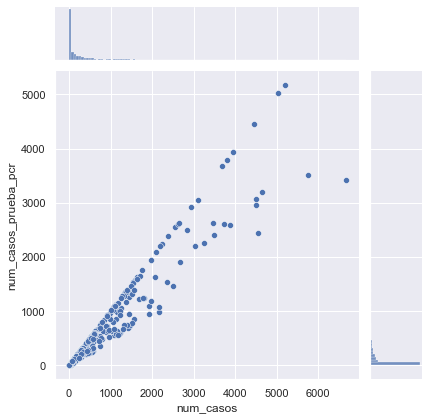

In [79]:
df2 = df.sample(frac=1).head(1000)
sns.jointplot(df2['num_casos'],df2['num_casos_prueba_pcr'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


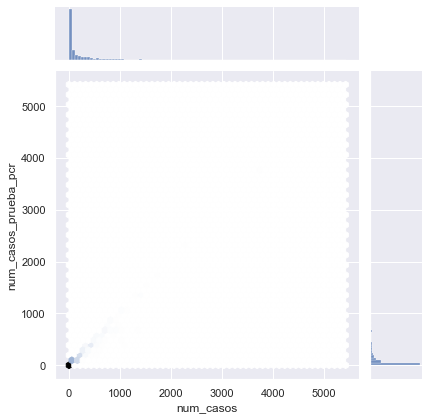

In [6]:
sns.jointplot(df2['num_casos'],df2['num_casos_prueba_pcr'],kind='hex')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


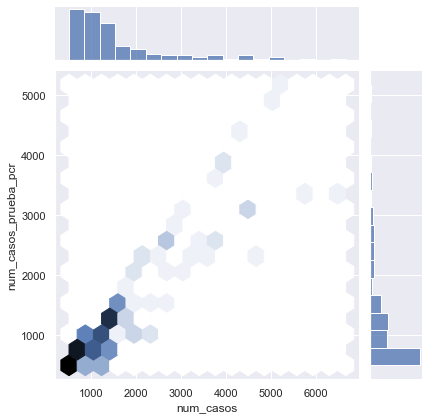

In [80]:
df3 = df2[df2['num_casos']>500]
df3 = df3[df3['num_casos_prueba_pcr']>500]
sns.jointplot(df3['num_casos'],df3['num_casos_prueba_pcr'],kind='hex')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


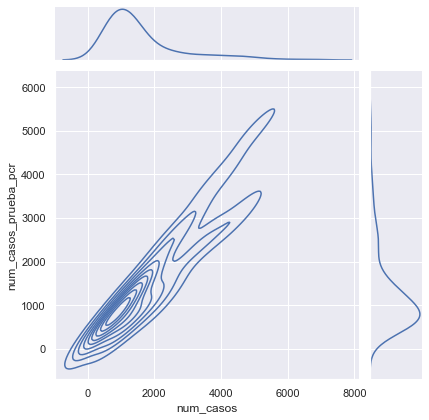

In [81]:
sns.jointplot(df3['num_casos'],df3['num_casos_prueba_pcr'],kind='kde')

In [87]:
df.loc[:,'fecha'] =  pd.to_datetime(df['fecha'],infer_datetime_format=True).dt.date
fecha_inicial = dt.date.today() - dt.timedelta(days=19)
dfaux = df[df['fecha'] >= fecha_inicial]
gb_df = pd.DataFrame(dfaux.groupby(['fecha','ccaa_iso'],as_index=False,dropna=False)['num_casos'].sum())
gb_df

,fecha,ccaa_iso,num_casos
0,2020-12-31,AN,1560
1,2020-12-31,AR,341
2,2020-12-31,AS,130
3,2020-12-31,CB,107
4,2020-12-31,CE,15
...,...,...,...
356,2021-01-18,ML,0
357,2021-01-18,NC,1
358,2021-01-18,PV,0
359,2021-01-18,RI,0


In [88]:
data = gb_df.pivot('fecha','ccaa_iso','num_casos')
data

ccaa_iso,AN,AR,AS,CB,CE,CL,CM,CN,CT,EX,GA,IB,MC,MD,ML,NC,PV,RI,VC
fecha,,,,,,,,,,,,,,,,,,,
2020-12-31,1560,341,130,107,15,483,996,240,2278,659,486,182,547,1504,38,95,381,141,2556
2021-01-01,1333,275,141,152,23,533,826,208,1519,562,454,657,477,1202,20,120,254,82,2387
2021-01-02,1562,305,152,110,24,647,875,205,1931,766,552,723,664,1626,23,118,379,100,2566
2021-01-03,1792,385,187,121,19,713,1029,209,1882,684,632,693,840,1297,19,133,383,125,2352
2021-01-04,2644,496,152,121,26,1080,1391,258,3805,1049,745,785,1159,4064,41,162,458,132,3276
2021-01-05,3096,548,190,134,24,1189,1777,219,3961,1117,820,628,1181,6659,51,148,598,167,3950
2021-01-06,2447,439,158,144,18,1028,1239,256,1963,977,783,477,1196,1579,22,174,430,156,3034
2021-01-07,3106,516,190,165,24,1211,1694,221,3676,1007,870,684,1307,4075,37,145,527,242,3496
2021-01-08,3896,623,237,216,38,1553,1603,246,4233,1232,909,682,1426,5698,51,168,674,248,3946


<AxesSubplot:xlabel='ccaa_iso', ylabel='fecha'>

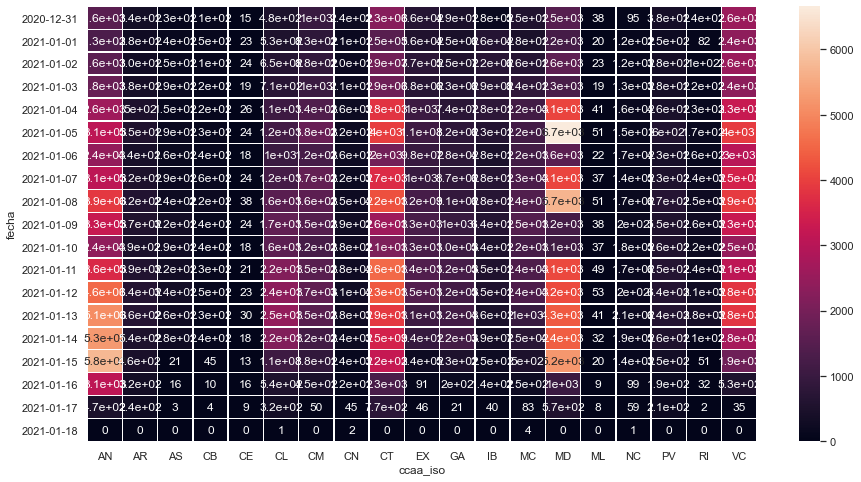

In [89]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(data=data,annot=True,linewidths=.5)

<AxesSubplot:xlabel='ccaa_iso', ylabel='fecha'>

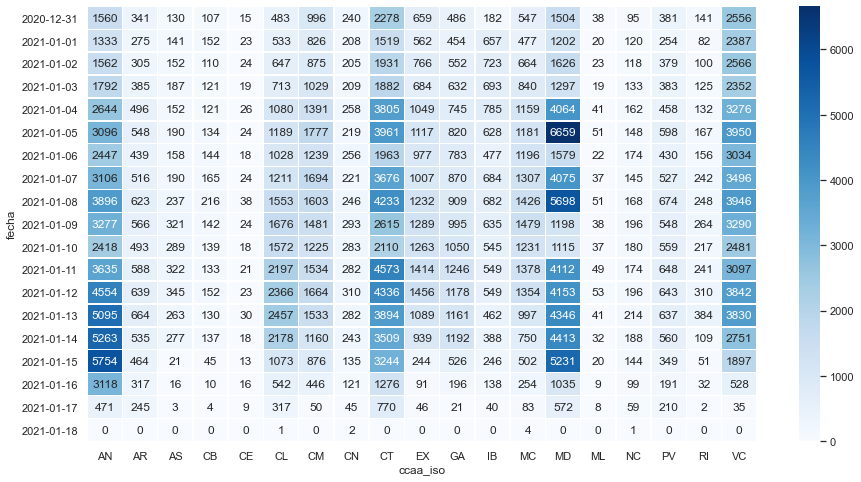

In [90]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(data=data,annot=True,linewidths=.5,cmap='Blues',fmt='g')